# NEKA - Haar Cascade Cropping

During this notebook Haar Cascade algorithm will be implemented to crop and preprocess the images that will be used for further model training.

## Imports

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np

## Load Data

In [5]:
data_dir='../../data/FaceImages/'
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 6797 files belonging to 2 classes.


## Sampling

Check the data has been loaded correctly from the data directory, through some raw pixel displays and some graphically plotting some of the images.

### Raw Data

In [6]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch

(array([[[[213.60938  , 204.60938  , 199.60938  ],
          [215.       , 206.       , 201.       ],
          [216.95312  , 207.95312  , 202.95312  ],
          ...,
          [163.69531  , 156.69531  , 140.69531  ],
          [128.       , 128.       , 128.       ],
          [128.       , 128.       , 128.       ]],
 
         [[214.60938  , 205.60938  , 200.60938  ],
          [215.       , 206.       , 201.       ],
          [215.04688  , 206.04688  , 201.04688  ],
          ...,
          [156.07031  , 149.07031  , 133.07031  ],
          [128.       , 128.       , 128.       ],
          [128.       , 128.       , 128.       ]],
 
         [[208.48047  , 197.48047  , 195.48047  ],
          [215.65625  , 204.65625  , 202.65625  ],
          [216.03516  , 205.03516  , 203.03516  ],
          ...,
          [157.       , 150.       , 134.       ],
          [128.       , 128.       , 128.       ],
          [128.       , 128.       , 128.       ]],
 
         ...,
 
         [[1

### Plot Some Images

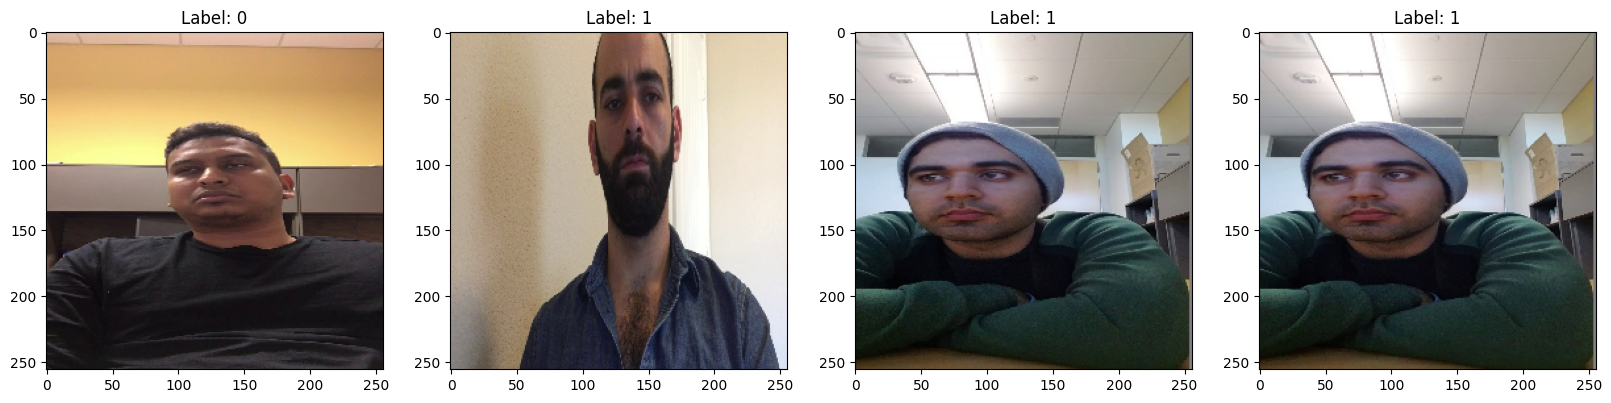

In [7]:
data_iterator=data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f"Label: {batch[1][idx]}")  # Display label
#plt.show()

## Haar Cacade - Preprocessing

*"A frontal face detection system which achieves detection and false positive rates which are equivalent to the best published results. This face detection system is most clearly distinguished from previous approaches in its ability to detect faces extremely rapidly."* [Viola, P. (2004). Robust real-time face detection - springer. https://link.springer.com/content/pdf/10.1023/B:VISI.0000013087.49260.fb.pdf ] 

### Load Needed Algorithm

Open Computer Vision's (OpenCV) implementation will be used to achieve the desired preprocessing. This has been dowloaded to `'artificial-inteligence/models'` directory.

In [8]:
# Load the Haar Cascade classifier
face_cascade = cv2.CascadeClassifier('../../models/haarcascade_frontalface_alt2.xml')
if face_cascade.empty():
    print("Error loading Haar Cascade classifier.")
else:
    print("Haar Cascade classifier loaded successfully.")

Haar Cascade classifier loaded successfully.


We'll apply the algorithm to some random photos.

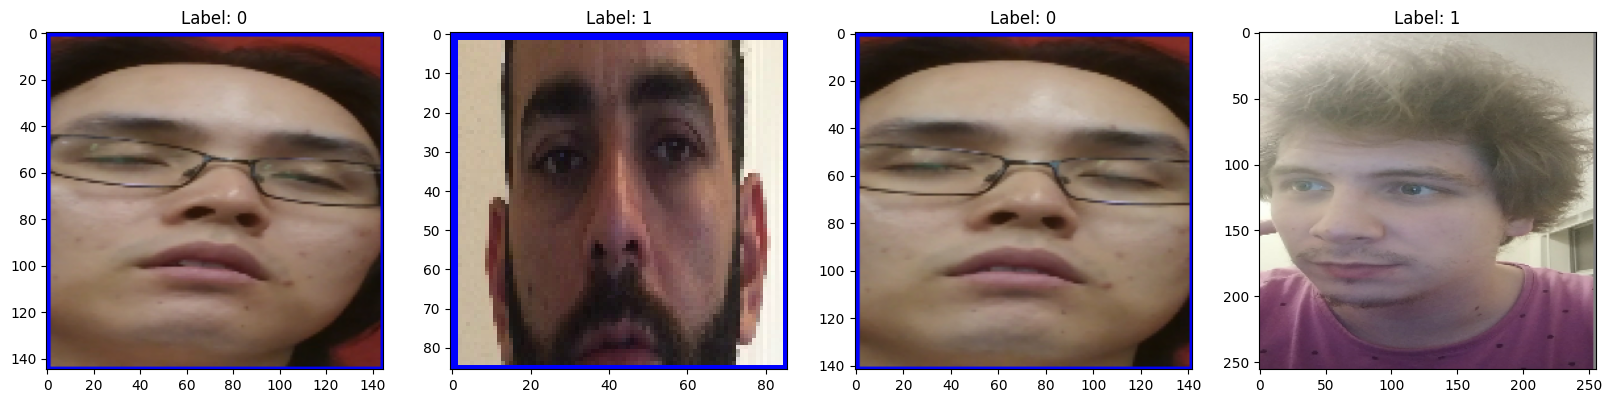

In [17]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.uint8)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    if len(faces) > 0:
        # Draw a rectangle around the main face and crop this
        (x, y, w, h) = faces[0]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        detected_face = img[y:y + h, x:x + w]
        ax[idx].imshow(detected_face.astype(int))
        ax[idx].title.set_text(f"Label: {batch[1][idx]}")  # Display label
    else:
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(f"Label: {batch[1][idx]}")  # Display label

As we can see on the output of the previous code cell, some images are not detected by the Haar Cascade. These will still be used without the cropping (the information they contain may be interesting).

In [24]:
def haarcascade_cropping(image, label):
    
    image = image.numpy()
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(np.uint8)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    
    # If no images are detected return the gray image
    ret = image
    
    # Draw rectangles around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        ret = img[y:y + h, x:x + w]
        
    return ret, label

In [25]:
data.map(haarcascade_cropping)

<class 'tensorflow.python.framework.ops.Tensor'>


AttributeError: in user code:

    File "C:\Users\rubio\AppData\Local\Temp\ipykernel_12200\2697605261.py", line 4, in haarcascade_cropping  *
        image = image.numpy()

    AttributeError: 'Tensor' object has no attribute 'numpy'


## Save Preprocessed Data

In [ ]:
# ...